In [10]:
import pandas as pd 
import numpy as np
df=pd.read_csv("reviews.csv")

In [11]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [12]:
print(df.keys())

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [13]:
df.shape

(568454, 10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [15]:
df.describe()


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [16]:
df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.countplot(x='Score',data=df,palette='RdBu')
plt.xlabel('Score (Rating)')
plt.show()

<Figure size 640x480 with 1 Axes>

In [25]:
temp_df = df[['UserId','HelpfulnessNumerator','HelpfulnessDenominator', 'Summary', 'Text','Score']].copy()

temp_df["Sentiment"] = temp_df["Score"].apply(lambda score: "positive" if score > 3 else \
                                              ("negative" if score < 3 else "not defined"))
temp_df["Usefulness"] = (temp_df["HelpfulnessNumerator"]/temp_df["HelpfulnessDenominator"]).apply\
(lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and\
                                                                        n <= 0.75 else "useless")))

temp_df.loc[temp_df.HelpfulnessDenominator == 0, 'Usefulness'] = ["useless"]
temp_df.shape

(568454, 8)

In [19]:
temp_df.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score
count,568454.000000,568454.00000,568454.000000
mean,1.743817,2.22881,4.183199
std,7.636513,8.28974,1.310436
min,0.000000,0.00000,1.000000
25%,0.000000,0.00000,4.000000
50%,0.000000,1.00000,5.000000
75%,2.000000,2.00000,5.000000
max,866.000000,923.00000,5.000000


In [20]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 8 columns):
UserId                    568454 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
Score                     568454 non-null int64
Sentiment                 568454 non-null object
Usefulness                568454 non-null object
dtypes: int64(3), object(5)
memory usage: 34.7+ MB


In [21]:
temp_df[temp_df.Score == 5].head(10)

,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Summary,Text,Score,Sentiment,Usefulness
0,A3SGXH7AUHU8GW,1,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,5,positive,>75%
4,A1UQRSCLF8GW1T,0,0,Great taffy,Great taffy at a great price. There was a wid...,5,positive,useless
6,A1SP2KVKFXXRU1,0,0,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,5,positive,useless
7,A3JRGQVEQN31IQ,0,0,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,5,positive,useless
8,A1MZYO9TZK0BBI,1,1,Yay Barley,Right now I'm mostly just sprouting this so my...,5,positive,>75%
9,A21BT40VZCCYT4,0,0,Healthy Dog Food,This is a very healthy dog food. Good for thei...,5,positive,useless
10,A3HDKO7OW0QNK4,1,1,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,5,positive,>75%
11,A2725IB4YY9JEB,4,4,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...,5,positive,>75%
14,A2MUGFV2TDQ47K,4,5,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,5,positive,>75%
15,A1CZX3CP8IKQIJ,4,5,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...,5,positive,>75%


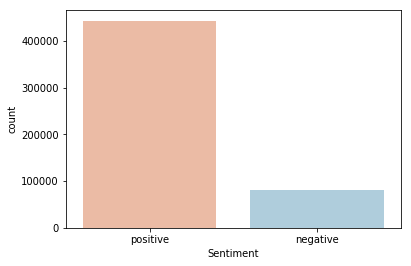

In [22]:
sns.countplot(x='Sentiment', order=["positive", "negative"], data=temp_df, palette='RdBu')
plt.xlabel('Sentiment')
plt.show()

In [23]:
temp_df.Sentiment.value_counts()

positive       443777
negative        82037
not defined     42640
Name: Sentiment, dtype: int64

In [26]:
pos = temp_df.loc[temp_df['Sentiment'] == 'positive']
pos = pos[0:25000]

neg = temp_df.loc[temp_df['Sentiment'] == 'negative']
neg = neg[0:25000]

In [ ]:
import